Kütüphaneler

In [37]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K 
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import layers, activations 

import pylab as plt
import matplotlib.pyplot as plt
import numpy as np

Veri Yükleme

In [38]:
base_dir = "../../veriler/tensorflow_f1"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_datagen = train_datagen.flow_from_directory(base_dir, target_size=(500,500), subset="training", batch_size=2)
test_datagen = test_datagen.flow_from_directory(base_dir, target_size=(500,500), subset="validation", batch_size=2)

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


In [39]:
train_datagen

Görselleştirme

(2, 500, 500, 3)
[0. 1. 0. 0.]


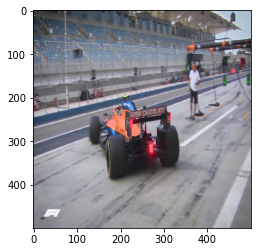

(2, 500, 500, 3)
[0. 0. 1. 0.]


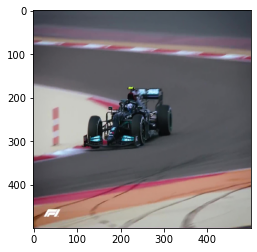

(2, 500, 500, 3)
[0. 0. 0. 1.]


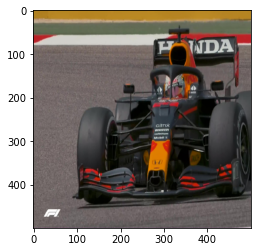

(2, 500, 500, 3)
[1. 0. 0. 0.]


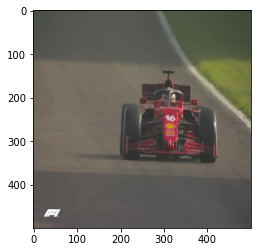

(2, 500, 500, 3)
[0. 0. 1. 0.]


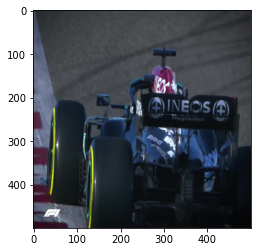

In [40]:
for _ in range(5):
    img, label = test_datagen.next()
    print(img.shape)

    plt.imshow(img[0])
    print(label[0])
    plt.show()

Sequential Model

In [41]:
model = Sequential()
model

In [42]:
model.add(layers.Conv2D(filters=4, activation="elu", kernel_size=(5,5), input_shape=(500,500,3)))
model.add(layers.MaxPooling2D(2,2 ))

model.add(layers.Conv2D(filters=8, activation="elu", kernel_size=(3,3)))
model.add(layers.MaxPooling2D(2,2 ))

model.add(layers.Conv2D(filters=16, activation="elu", kernel_size=(2,2)))
model.add(layers.MaxPooling2D(2,2 ))

model.add(layers.Conv2D(filters=32, activation="elu", kernel_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(50, activation="elu"))
model.add(layers.Dense(100, activation="elu"))
model.add(layers.Dense(100, activation="elu"))
model.add(layers.Dense(50, activation="elu"))
model.add(layers.Dense(4, activation="softmax"))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 496, 496, 4)       304       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 248, 248, 4)      0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 246, 246, 8)       296       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 123, 123, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 122, 122, 16)      528       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 61, 61, 16)      

Modelin Eğitimi

In [47]:
optimizer = tf.keras.optimizers.Adamax(learning_rate= 0.001)
loss = tf.keras.losses.CategoricalCrossentropy()


In [48]:
model.compile(optimizer=optimizer, loss=loss, metrics=["mse", "accuracy"])


In [49]:
result = model.fit(train_datagen, epochs=5, verbose=1, validation_data=test_datagen)

Epoch 1/5
126/126 [==============================] - 22s 169ms/step - loss: 1.2155 - mse: 0.1597 - accuracy: 0.5198 - val_loss: 1.4057 - val_mse: 0.1643 - val_accuracy: 0.5357
Epoch 2/5
126/126 [==============================] - 21s 165ms/step - loss: 0.3967 - mse: 0.0531 - accuracy: 0.8571 - val_loss: 1.3648 - val_mse: 0.1956 - val_accuracy: 0.5357
Epoch 3/5
126/126 [==============================] - 21s 166ms/step - loss: 0.1474 - mse: 0.0167 - accuracy: 0.9643 - val_loss: 1.6557 - val_mse: 0.1647 - val_accuracy: 0.6429
Epoch 4/5
126/126 [==============================] - 21s 165ms/step - loss: 0.0439 - mse: 0.0036 - accuracy: 0.9921 - val_loss: 1.7575 - val_mse: 0.1746 - val_accuracy: 0.5714
Epoch 5/5
126/126 [==============================] - 21s 169ms/step - loss: 0.0129 - mse: 2.6968e-04 - accuracy: 1.0000 - val_loss: 1.8954 - val_mse: 0.1859 - val_accuracy: 0.5357


In [52]:
result.history

{'loss': [1.2155215740203857,
  0.39666658639907837,
  0.14740343391895294,
  0.04389885440468788,
  0.012890626676380634],
 'mse': [0.1596519500017166,
  0.053075678646564484,
  0.016657570376992226,
  0.0035519562661647797,
  0.00026968191377818584],
 'accuracy': [0.5198412537574768,
  0.8571428656578064,
  0.9642857313156128,
  0.9920634627342224,
  1.0],
 'val_loss': [1.4057276248931885,
  1.3648207187652588,
  1.655721664428711,
  1.7575219869613647,
  1.8953605890274048],
 'val_mse': [0.16427825391292572,
  0.19561462104320526,
  0.16469159722328186,
  0.17463411390781403,
  0.1859431117773056],
 'val_accuracy': [0.5357142686843872,
  0.5357142686843872,
  0.6428571343421936,
  0.5714285969734192,
  0.5357142686843872]}